In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/lambardaar/Desktop/STUDY/python/CA/Bank_Churn.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Removing unwanted columns and encoding categorical columns


In [56]:
df=df.drop(['CustomerId','Surname'],axis=1)

le_gender = LabelEncoder()
le_geo = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Geography'] = le_geo.fit_transform(df['Geography'])



Replacing 0 to mean of column BALANCE.


In [57]:
df['Balance']=df['Balance'].replace(0,df['Balance'].mean())
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,76485.889288,1,1,1,101348.88,1
1,608,2,0,41,1,83807.860000,1,0,1,112542.58,0
2,502,0,0,42,8,159660.800000,3,1,0,113931.57,1
3,699,0,0,39,1,76485.889288,2,0,0,93826.63,0
4,850,2,0,43,2,125510.820000,1,1,1,79084.10,0


In [58]:

X=df.drop('Exited',axis=1)
y=df['Exited']


In [59]:
scale=StandardScaler()
X_scaled=scale.fit_transform(X)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


0.852
confusion matrix:
 [[1563   44]
 [ 252  141]]
classification report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.76      0.36      0.49       393

    accuracy                           0.85      2000
   macro avg       0.81      0.67      0.70      2000
weighted avg       0.84      0.85      0.83      2000



<function matplotlib.pyplot.show(close=None, block=None)>

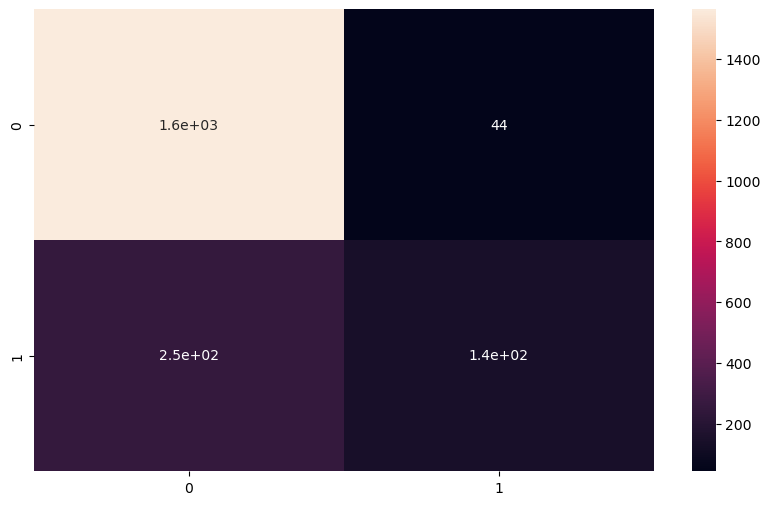

In [61]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)
print(accuracy_score(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("classification report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)
plt.show


For Predecting new Value

In [62]:
def predict_churn_args(credit_score, geography, gender, age, tenure,
                       balance, num_products, has_card, is_active, salary):
    
    geo_enc = le_geo.transform([geography])[0] 
    gen_enc = le_gender.transform([gender])[0] 

    temp = pd.DataFrame([[
        credit_score, geo_enc, gen_enc,
        age, tenure, balance, num_products,
        has_card, is_active, salary
    ]], columns=X.columns)

    u_scaled = scale.transform(temp)

    pred = tree.predict(u_scaled)[0]
    
    if pred == 1:
        return "Churn (1)"
    else:
        return "Not Churn (0)"


In [68]:

predict_churn_args(500, "Germany", "Female", 45, 2, 150000, 1, 1, 0, 90000)

'Not Churn (0)'

In [67]:
predict_churn_args(400, "Germany", "Female", 55, 1, 180000, 1, 1, 0, 60000)


'Churn (1)'